# Ch 7_3 - Gibbs Sampling and MCMC Evaluation

## Gibbs Sampling
### The limits of Metropolis
The main limitation of the metropolis algorithm is that we need to specify a well tuned proposal distribution (or else lose sampling efficiency) and even with a good sampling distribution the maximum efficiency is still quite low.

### How Gibbs Sampling works
In multiple dimensions, instead of sampling from the multivariate normal around the selected point to get a new value for each parameter, you instead change each parameter one at a time and sample it from the distribution of that parameter when all other parameters are fixed, i.e. if $\theta_i$ is the parameter we are currently changing then we sample from:
$$p(\theta_i \, | \, \{\theta_{j \neq i}\}, D)$$

##### When does it work?
Gibbs Sampling works best when:
1. $p(\{\theta_{i}\} \, | \, D)$ is not solvable analytically and cannot be directly sampled
2. $p(\theta_i \, | \, \{\theta_{j \neq i}\}, D)$ can be determined and directly sampled for all $\theta_i$

### Gibbs Coin Flip
So what is $p(\theta_i \, | \, \{\theta_{j \neq i}\}, D)$ in the 2-coin coin flip example?

Well:
$$p(\theta_i \, | \, \theta_j, D) = \frac{p(\theta_i, \theta_j  \, | \, D)}{p(\theta_j  \, | \, D)}$$

**Hold on how did you get that?**
Recall from your notes that p(A|B|C) = p(A|B,C). So prove this equality just let U = B|C and then the conditional probability formula gives p(A|U) = p(A,U)/P(U) which is the answer (once you sub for U again).

Continuing:
$$p(\theta_i \, | \, \theta_j, D) = \frac{p(\theta_i, \theta_j  \, | \, D)}{\int p(\theta_i, \theta_j  \, | \, D), d\theta_i}$$

Since as we have covered we can use the beta and bernoulli distributions to model this:  

$$p(\theta_i, \theta_j  \, | \, D) = \textrm{beta}(\theta_i, z_i + a_i, N_i - z_i + b_i) \; \textrm{beta}(\theta_j, z_j + a_j, N_j - z_j + b_j)$$

$$\int p(\theta_i, \theta_j  \, | \, D) \, d\theta_i = \textrm{beta}(\theta_j, z_j + a_j, N_j - z_j + b_j)$$ 

Thus:

$$p(\theta_i \, | \, \theta_j, D) = \textrm{beta}(\theta_i, z_i + a_i, N_i - z_i + b_i)$$

### Ok so how do we use it (and metropolis) to compare $\theta\,$'s?
This is pretty neat. In both sampling algorithms, each time we move it's to a "credible" position - either it has a higher posterior or (and in the Gibbs case) the posterior is much more likely to move if the posterior is at least high-ish. As a result of this, we can take the difference in our parameters ($\theta_1 - \theta_2$) in each step and examine to histogram of these differences. If $\theta_1$ and $\theta_2$ **are** the same then this distance will be often 0 and the value '0' will appear often and thus be a peak in the histogram. Confidence intervals can be approximated from the proportion of samples falling within a given range of each other (for example if 95% of the intervals are within 0.1 of each other around a mean on 0.4 then the 95% HDI (highest density interval) will be 0.3 to 0.5.

## Evaluation

In this section we cover how to evaluate questions like "have I iterated enough?". First though, some basic concepts:

#### Autocorrelation
Autocorrelation is a measure of 'clumpiness'. Essentially, we look at the correlation of some chain of steps of length 'N' and compare it with itself offset by some number of points 'k' (called *lag*) into the future.

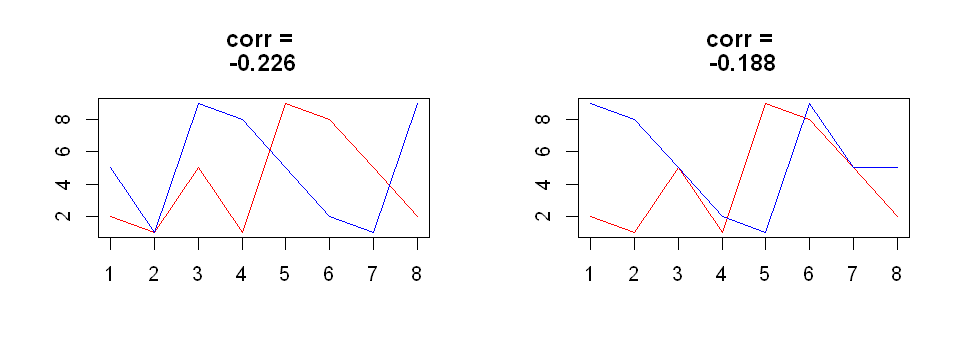

In [1]:
#Set up for plots:
options(warn=-1)
library(repr)
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,2))

#Basic autocorrelation:
sequence = sample(1:9, 20, replace = TRUE)

#Speficy some initial chain
start = 3
N = 7
sample_chain = sequence[start: (start+N)]

#specify a lag value to try
k_1 = 2
sample_chain_lag = sequence[(start+k_1): (start+N+k_1)]
plot(seq(N+1), sample_chain, type = "line", ann = FALSE, col = "red", )
par(new=TRUE)
plot(seq(N+1), sample_chain_lag, axes = FALSE, type = "line", ann = FALSE, col = "blue")
title(paste(c('corr = ', toString(round(cor(sample_chain, sample_chain_lag), 3)))))

#specify a lag value to try
k_2 = 4
sample_chain_lag = sequence[(start+k_2): (start+N+k_2)]
plot(seq(N+1), sample_chain, type = "line", ann = FALSE, col = "red", )
par(new=TRUE)
plot(seq(N+1), sample_chain_lag, axes = FALSE, type = "line", ann = FALSE, col = "blue")
title(paste(c('corr = ', toString(round(cor(sample_chain, sample_chain_lag), 3)))))

The 'Autocorrelation function' usually refers to the process of testing the autocorrelation for a range of different lag values (for example 1 through 20).

If you plot the autocorrelation for a range of steps, you should see a steep downward trend. The slower the process takes to have a low correlation, the less independent information you are getting about the distribution from which you are sampling for each Gibbs/Metropolis iteration.

### Effective Sample Size
The effective sample size is a measure of the actual sample size divided by the autocorrelation. 
$$\textrm{ESS} = N \big/ \big( 1 + 2 \, \sum_{k=1}^{\infty} \, ACF(k) \big)$$
where ACF(k) is the autocorrelation with lag k

**How much ESS do I need?**  
For reasonably good estimates of sensitive parameters such as the 95% HDI, and ESS of around 10,000 is recommended. 

### ESS and estimation of Standard Errors
Recall that the standard error of the sample mean is:
$$\widehat{\textrm{SE}}(\bar{Y}) = \frac{\widehat{SD}(Y_i)}{\sqrt{N}}$$
In Monte Carlo scenarios, we should use the ESS instead:
$$\widehat{\textrm{SEMC}}(\bar{Y}) = \frac{\widehat{SD}(Y_i)}{\sqrt{ESS}}$$
Note that the 'hats' here signify estimates.



### MCMC Efficiency
Read the final section (on efficiency) for some practical ways to make MCMC run faster.